# Latin Hypercube Generator Example
This notebook demonstrates basic use of the latin hypercube generator. This generator is a wrapper for the scipy latin hypercube method and allows users to efficiently sample functions (eg for surrogate models). Because the distribution of points depends on the number of sample requested, internally the xopt routine stores a batch of samples. The batch size is specified as an argument to the object's constructor. All other parameters to the scipy function are broken out this way and for a detailed explanation of what they do, the scipy documentation should be consulted.

In [1]:
from copy import deepcopy
from xopt import Xopt, Evaluator
from xopt.generators.scipy.latin_hypercube import LatinHypercubeGenerator
from xopt.resources.test_functions.tnk import evaluate_TNK, tnk_vocs
import matplotlib.pyplot as plt

In [2]:
# Create the test problem
vocs = deepcopy(tnk_vocs)
vocs.objectives = {}
vocs.observables = ["y1"]
evaluator = Evaluator(function=evaluate_TNK)

# Create the generator and xopt object. Note: the samples are generated in
# batches and the batch size determines the arrangement of points to cover
# the bounded region of the variables.
generator = LatinHypercubeGenerator(vocs=vocs, batch_size=1024)
X = Xopt(generator=generator, evaluator=evaluator, vocs=vocs)
X


            Xopt
________________________________
Version: 0+untagged.1379.gc1dda19.dirty
Data size: 0
Config as YAML:
dump_file: null
evaluator:
  function: xopt.resources.test_functions.tnk.evaluate_TNK
  function_kwargs:
    raise_probability: 0
    random_sleep: 0
    sleep: 0
  max_workers: 1
  vectorized: false
generator:
  batch_size: 1024
  name: latin_hypercube
  optimization: random-cd
  scramble: true
  seed: null
  strength: 1
  supports_batch_generation: true
  supports_multi_objective: true
max_evaluations: null
serialize_inline: false
serialize_torch: false
strict: true
vocs:
  constants:
    a: dummy_constant
  constraints:
    c1:
    - GREATER_THAN
    - 0.0
    c2:
    - LESS_THAN
    - 0.5
  objectives: {}
  observables:
  - y1
  variables:
    x1:
    - 0.0
    - 3.14159
    x2:
    - 0.0
    - 3.14159


In [3]:
# Sample the function a number of times using latin hypercube points
for _ in range(1024):
    X.step()
X.data.head()

,x1,x2,a,y1,y2,c1,c2,xopt_runtime,xopt_error
0,1.009845,2.077223,dummy_constant,1.009845,2.077223,4.277038,2.747573,0.000016,False
1,0.713416,3.121767,dummy_constant,0.713416,3.121767,9.344300,6.919210,0.000008,False
2,1.052814,1.702909,dummy_constant,1.052814,1.702909,3.092768,1.752594,0.000006,False
3,1.138037,0.926509,dummy_constant,1.138037,0.926509,1.159827,0.589002,0.000006,False
4,0.769882,2.637078,dummy_constant,0.769882,2.637078,6.563578,4.639939,0.000006,False


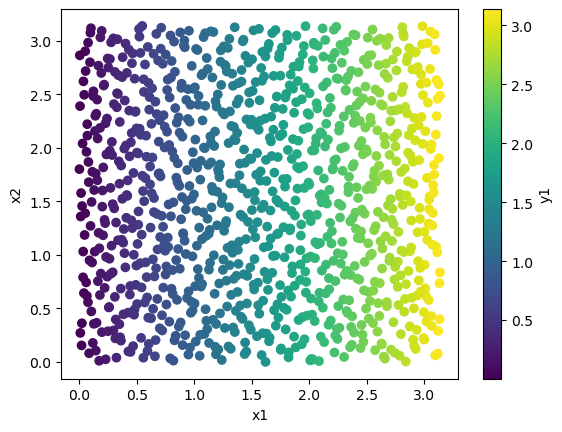

In [4]:
# Plot the data
plt.scatter(X.data['x1'], X.data['x2'], c=X.data['y1'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='y1')